### Problem Statement: 
#### The Sales Manager of BeerMart want to build a recommendation system (collaborative) for your store, where customers will be recommended the beer that they are most likely to buy.


### Note:
I have answered all the questins, but not in a sequential order.

In [1]:
##Importing the required libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
beer_df=pd.read_csv('beer_data.csv')

In [3]:
beer_df.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


In [4]:
beer_df.shape

(475984, 3)

In [5]:
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475984 entries, 0 to 475983
Data columns (total 3 columns):
beer_beerid           475984 non-null int64
review_profilename    475884 non-null object
review_overall        475984 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.9+ MB


#### Data Quality Checks:
1. Dropping the Null Values
2. Checking for the duplicate values

In [6]:
## dropping the fields which has null values
beer_df=beer_df[~pd.isna(beer_df['review_profilename'])]

In [7]:
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475884 entries, 0 to 475983
Data columns (total 3 columns):
beer_beerid           475884 non-null int64
review_profilename    475884 non-null object
review_overall        475884 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.5+ MB


In [8]:
## Dropiing the duplicate values
beer_df.drop_duplicates(inplace=True)

In [9]:
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475304 entries, 0 to 475983
Data columns (total 3 columns):
beer_beerid           475304 non-null int64
review_profilename    475304 non-null object
review_overall        475304 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.5+ MB


In [10]:
beer_df.groupby(['beer_beerid']).count().describe()

,review_profilename,review_overall
count,40304.000000,40304.000000
mean,11.792973,11.792973
std,42.007656,42.007656
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,5.000000,5.000000
max,980.000000,980.000000


In [11]:
beer_df.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


In [12]:
group=pd.DataFrame(beer_df.groupby(['beer_beerid']).count())

In [13]:
group.describe(percentiles=[0.5,0.60,0.70,0.75,0.80,0.85,0.90,0.95,])

,review_profilename,review_overall
count,40304.000000,40304.000000
mean,11.792973,11.792973
std,42.007656,42.007656
min,1.000000,1.000000
50%,2.000000,2.000000
60%,2.000000,2.000000
70%,4.000000,4.000000
75%,5.000000,5.000000
80%,7.000000,7.000000
85%,12.000000,12.000000


In [14]:
#plt.boxplot(group['review_overall'])

In [15]:
group.head()

,review_profilename,review_overall
beer_beerid,,
3,2,2
4,6,6
5,113,113
6,253,253
7,206,206


### Q1: The value of N is taken as 40. So beer ids having less than 40 reviews is dropped

In [16]:
group1=group[group['review_overall']>40]

In [17]:
group1.shape

(2455, 2)

In [18]:
group1.head()

,review_profilename,review_overall
beer_beerid,,
5,113,113
6,253,253
7,206,206
10,218,218
14,59,59


In [19]:
my_list=[]
my_list = group1.index.values

In [20]:
my_list

array([    5,     6,     7, ..., 74579, 74986, 75086], dtype=int64)

In [21]:
len(my_list)

2455

In [22]:
#gapminder_years= gapminder[gapminder.year.isin(years)]
beer=beer_df[beer_df.beer_beerid.isin(my_list)]

In [23]:
beer.shape

(314069, 3)

In [24]:
beer.drop_duplicates(inplace=True)

C:\Users\156638\AppData\Local\Continuum\anaconda3.1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
beer.shape

(314069, 3)

In [26]:
beer.head(40)

,beer_beerid,review_profilename,review_overall
12,436,Brent,3.0
18,25414,NJpadreFan,4.0
19,25414,vacax,2.5
20,25414,mikesgroove,4.0
21,25414,hdofu,4.0
22,25414,argock,3.5
23,25414,IMincedTheKing,4.0
24,25414,zeff80,4.0
25,25414,akorsak,4.0
26,25414,wchesak,4.0


### Q 2.1: What are the unique values of ratings?

In [27]:
## Q2.1--Unique Values of rating.
beer_ratings_values=list(beer.review_overall.unique())
print(beer_ratings_values)

[3.0, 4.0, 2.5, 3.5, 5.0, 4.5, 2.0, 1.5, 1.0]


### Q 2.2.1: Visualize the Avg Beer Ratings

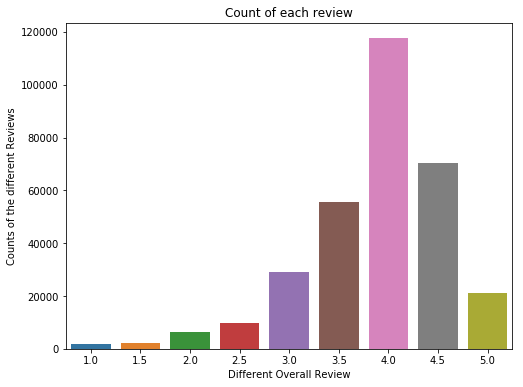

In [28]:
#Lets see the counts of these reviews count visually 

reviews_over_c = pd.DataFrame(beer['review_overall'].value_counts()).reset_index()

plt.figure(figsize=(8,6))
plt.title("Count of each review")

sns.barplot(y=reviews_over_c.review_overall,x=reviews_over_c['index'])

plt.xlabel("Different Overall Review")
plt.ylabel("Counts of the different Reviews")

plt.show()

In [29]:
beer.groupby('beer_beerid').mean()[['review_overall']]

,review_overall
beer_beerid,
5,3.553097
6,3.711462
7,3.317961
10,3.883028
14,3.830508
15,3.824074
17,3.429752
19,4.009036
30,4.094398


### Q2.2.2: Visualize the Avg User ratings

In [30]:
beer.groupby('review_profilename').mean()[['review_overall']]

,review_overall
review_profilename,
0110x011,4.333333
01Ryan10,5.000000
04101Brewer,4.000000
05Harley,4.140625
0beerguy0,4.166667
0runkp0s,3.500000
0tt0,3.964286
1000Bottles,3.750000
1001111,4.000000


### Q 2.2.3: The average number of ratings given to the beers

In [31]:
beer.review_overall.mean()

3.87567540890696

### Q2.2.4: The average number of ratings given by the users

In [32]:
avg_user_rating=pd.DataFrame(beer.groupby('review_profilename').mean()[['review_overall']])
avg_user_rating.review_overall.mean()

3.946337312854379

## Recommendation Model

### Q 3.1: Divide your data into training and testing dataset.

In [33]:
## Q3.1: Divide your data into training and testing data sets:

from sklearn.model_selection import train_test_split
train, test = train_test_split(beer, test_size=0.30, random_state=31)

In [34]:
print(train.shape)
print(test.shape)

(219848, 3)
(94221, 3)


In [35]:
train.head()

,beer_beerid,review_profilename,review_overall
305717,13726,Freshie,3.5
367146,448,RoyalT,4.5
188898,35741,PittBeerGirl,3.5
106274,100,Gusler,3.0
184505,691,BucannonXC5,3.0


In [36]:
test.head()

,beer_beerid,review_profilename,review_overall
212579,45073,Jmoore50,4.0
127621,24751,skrib09,2.0
312186,944,edmundfitzoil,3.0
461148,38795,brystmar,1.5
392009,1642,maccroz,2.5


### Q3.2 Building the User Based Model

In [37]:
# pivot ratings into  features
df_beer_features = train.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(0)

In [38]:
df_beer_features.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,74123,74272,74321,74323,74390,74530,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01Ryan10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04101Brewer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
dummy_train = train.copy()
dummy_test = test.copy()

In [40]:
dummy_train['review_overall'] = dummy_train['review_overall'].apply(lambda x: 0 if x>=1 else 1)
dummy_test['review_overall'] = dummy_test['review_overall'].apply(lambda x: 1 if x>=1 else 0)

In [41]:
# The beer not rated by user is marked as 1 for prediction. 
dummy_train = dummy_train.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(1)

# The beer not rated by user is marked as 0 for evaluation. 
dummy_test = dummy_test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(0)

In [42]:
dummy_train.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,74123,74272,74321,74323,74390,74530,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01Ryan10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
04101Brewer,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
05Harley,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0beerguy0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [43]:
dummy_test.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,74123,74272,74321,74323,74390,74530,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0runkp0s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# pivot ratings into beer features
df_beer_features = train.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [45]:
df_beer_features.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,74123,74272,74321,74323,74390,74530,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01Ryan10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04101Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0beerguy0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
mean = np.nanmean(df_beer_features, axis=1)
df_subtracted = (df_beer_features.T-mean).T

In [47]:
df_subtracted.shape

(17434, 2455)

In [48]:
df_subtracted.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,74123,74272,74321,74323,74390,74530,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01Ryan10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04101Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0beerguy0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


### Q3.3 :Determine how similar the first 10 users are to each other and visualise it

In [50]:
users_list=[]
users_list=df_beer_features.index[:]
user_correlation_df=pd.DataFrame(user_correlation,columns=users_list,index=users_list)
#user_correlation_df.set_index(df_beer_features.review_profilename,inplace=True)
user_correlation_df


review_profilename,0110x011,01Ryan10,04101Brewer,05Harley,0beerguy0,0tt0,1000Bottles,1001111,100floods,1050Sudz,...,zulufactor,zumicroom,zwalk8,zwan,zymrgy,zymurgy4all,zymurgywhiz,zythus,zyzygy,zzajjber
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,-0.039513,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
01Ryan10,0.000000,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
04101Brewer,0.000000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
05Harley,0.000000,0.0,0.0,1.000000,0.0,0.222796,0.000000,0.0,-0.005789,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
0beerguy0,0.000000,0.0,0.0,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
0tt0,0.000000,0.0,0.0,0.222796,0.0,1.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1000Bottles,0.000000,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1001111,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
100floods,-0.039513,0.0,0.0,-0.005789,0.0,0.000000,0.000000,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0


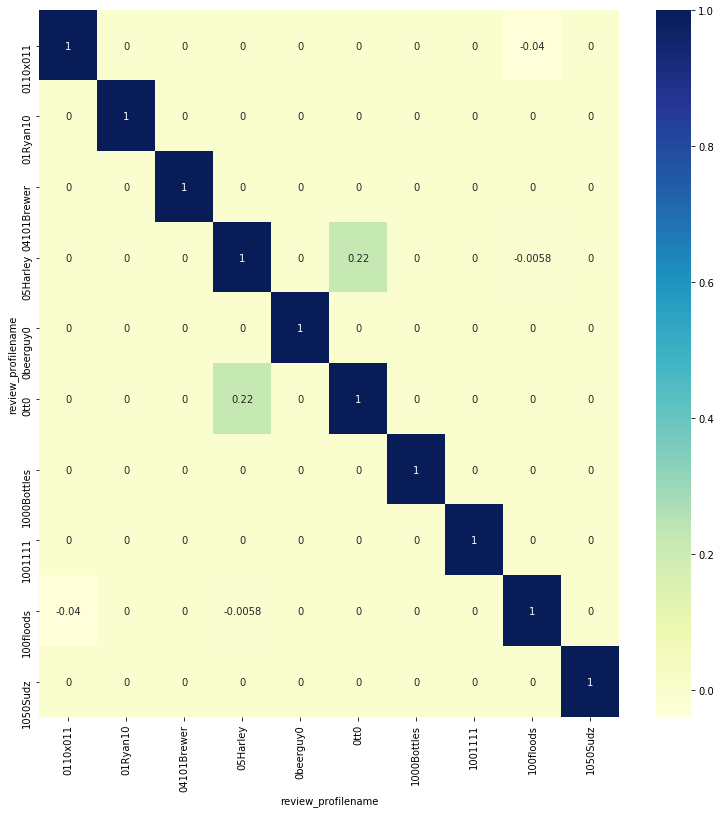

In [51]:
plt.figure(figsize=(13,13))
sns.heatmap(user_correlation_df.iloc[:10,:10],annot=True,cmap='YlGnBu')
plt.show()
        

We can observe that out of the top 10 Users-'0tt0' and '05Harley'  have a high correlatin score of 0.22

In [52]:
##Prediction

user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [53]:
user_predicted_ratings = np.dot(user_correlation, df_beer_features.fillna(0))
user_predicted_ratings

array([[1.34273922, 1.96171197, 2.32733854, ..., 0.95435259, 3.97776228,
        1.35567874],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.13378443, 2.43295247, 1.68247093, ..., 0.23862441, 0.41112876,
        1.13675699],
       [0.91090045, 6.86932891, 3.82409248, ..., 0.59868795, 0.45115483,
        1.82817269],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [54]:
user_predicted_ratings.shape

(17434, 2455)

In [55]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,74123,74272,74321,74323,74390,74530,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,1.342739,1.961712,2.327339,2.467365,0.491102,1.062799,1.963157,2.987562,7.128565,3.055179,...,0.433387,0.710108,0.519090,1.025834,1.168990,0.634895,1.137657,0.954353,3.977762,1.355679
01Ryan10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
04101Brewer,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
05Harley,1.587367,3.689466,2.948174,4.856169,0.818641,0.841765,3.802088,2.775018,10.894060,4.406601,...,1.422200,2.104721,0.736699,1.839743,0.913403,1.158253,1.054528,2.053561,5.721314,2.096039
0beerguy0,0.702935,1.353188,1.633949,3.346564,0.163870,0.000000,1.205371,0.807193,2.442682,3.773986,...,0.126256,0.702539,0.037857,0.132334,0.294280,0.744287,0.000000,0.151238,0.185028,0.170408


In [56]:
user_final_rating.iloc[3].sort_values(ascending=False)[0:5]

beer_beerid
412      28.024721
17112    26.743740
19960    26.007924
2093     25.611363
1093     24.552050
Name: 05Harley, dtype: float64

### Q3.6 : Top 5 beer recommended to Cokes, Genog and Giblet using User Based Model

In [57]:
## Top 5 beer recommended to Cokes
user_final_rating.loc['cokes'].sort_values(ascending=False)[0:5]

beer_beerid
412     39.674669
1093    37.176258
34      37.134681
92      35.815279
1904    34.331631
Name: cokes, dtype: float64

In [58]:
## Top 5 beer recommended to genong
user_final_rating.loc['genog'].sort_values(ascending=False)[0:5]

beer_beerid
2093    40.436544
1093    40.109312
412     38.780763
92      32.834756
1013    31.980699
Name: genog, dtype: float64

In [59]:
## Top 5 beer recommended to giblet
user_final_rating.loc['giblet'].sort_values(ascending=False)[0:5]

beer_beerid
2093    46.159923
412     43.081851
34      36.580016
1093    35.767764
276     34.841050
Name: giblet, dtype: float64

### Q3.2 Item Based Model

In [60]:
beer_item_features = train.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).T

beer_item_features.head()

review_profilename,0110x011,01Ryan10,04101Brewer,05Harley,0beerguy0,0tt0,1000Bottles,1001111,100floods,1050Sudz,...,zulufactor,zumicroom,zwalk8,zwan,zymrgy,zymurgy4all,zymurgywhiz,zythus,zyzygy,zzajjber
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
mean = np.nanmean(beer_item_features, axis=1)
df_subtracted = (beer_item_features.T-mean).T

In [62]:
df_subtracted.head()

review_profilename,0110x011,01Ryan10,04101Brewer,05Harley,0beerguy0,0tt0,1000Bottles,1001111,100floods,1050Sudz,...,zulufactor,zumicroom,zwalk8,zwan,zymrgy,zymurgy4all,zymurgywhiz,zythus,zyzygy,zzajjber
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.00000000e+00  7.40052794e-03 -1.00830809e-04 ... -4.38581579e-02
  -6.31763105e-04 -7.35370590e-04]
 [ 7.40052794e-03  1.00000000e+00 -3.73709048e-02 ... -3.65234669e-03
   2.21466906e-03  2.57786895e-03]
 [-1.00830809e-04 -3.73709048e-02  1.00000000e+00 ...  0.00000000e+00
   2.66317794e-03 -5.73917911e-03]
 ...
 [-4.38581579e-02 -3.65234669e-03  0.00000000e+00 ...  1.00000000e+00
   1.63712847e-03  0.00000000e+00]
 [-6.31763105e-04  2.21466906e-03  2.66317794e-03 ...  1.63712847e-03
   1.00000000e+00 -1.32072603e-02]
 [-7.35370590e-04  2.57786895e-03 -5.73917911e-03 ...  0.00000000e+00
  -1.32072603e-02  1.00000000e+00]]


### Q3.4: Compute and visualise the similarity between the first 10 beers.

In [64]:
item_correlation_df=pd.DataFrame(item_correlation)
item_correlation_df


,0,1,2,3,4,5,6,7,8,9,...,2445,2446,2447,2448,2449,2450,2451,2452,2453,2454
0,1.000000,0.007401,-0.000101,-0.025003,-0.012443,-0.007324,0.008554,0.012406,-0.008807,0.008461,...,-0.000838,-0.008367,0.005034,-0.000433,-0.000587,0.000000,0.004979,-0.043858,-0.000632,-0.000735
1,0.007401,1.000000,-0.037371,0.020435,0.024987,0.007568,-0.012020,-0.020700,-0.000127,0.002245,...,-0.000140,-0.002654,-0.025559,0.004555,0.017113,0.000000,0.000000,-0.003652,0.002215,0.002578
2,-0.000101,-0.037371,1.000000,-0.034300,-0.001984,-0.005000,-0.010171,-0.010412,0.002982,-0.059738,...,0.000000,0.036411,0.011000,-0.025284,0.000000,-0.023777,0.014955,0.000000,0.002663,-0.005739
3,-0.025003,0.020435,-0.034300,1.000000,0.023547,0.000000,0.047233,-0.015789,0.003845,0.003353,...,-0.000098,-0.013181,0.008007,0.024756,-0.005375,-0.005374,-0.003613,0.001214,0.006760,-0.039783
4,-0.012443,0.024987,-0.001984,0.023547,1.000000,0.065195,0.001776,0.017422,0.007868,0.012919,...,0.001713,0.000000,0.000000,0.000000,0.001199,0.000000,0.000000,0.000000,0.000000,0.001503
5,-0.007324,0.007568,-0.005000,0.000000,0.065195,1.000000,0.019834,-0.015682,0.012186,0.060166,...,0.023670,0.000000,0.000000,0.000000,-0.001414,0.000000,0.000000,0.000000,0.000000,0.012410
6,0.008554,-0.012020,-0.010171,0.047233,0.001776,0.019834,1.000000,0.027308,-0.017760,0.048670,...,0.006231,-0.039956,0.000000,0.003547,0.018343,0.035785,-0.006786,-0.007000,-0.010272,-0.004162
7,0.012406,-0.020700,-0.010412,-0.015789,0.017422,-0.015682,0.027308,1.000000,0.013850,-0.014793,...,0.000000,0.000165,0.000000,0.001857,0.000000,0.000434,0.000000,0.000000,0.018656,0.000000
8,-0.008807,-0.000127,0.002982,0.003845,0.007868,0.012186,-0.017760,0.013850,1.000000,-0.001369,...,0.003272,0.009489,-0.003738,0.022139,-0.013691,-0.035755,0.023942,0.006448,-0.006394,-0.000840
9,0.008461,0.002245,-0.059738,0.003353,0.012919,0.060166,0.048670,-0.014793,-0.001369,1.000000,...,0.005311,0.061081,-0.000130,-0.000023,-0.009795,-0.027985,0.000000,0.000000,-0.035103,0.004709


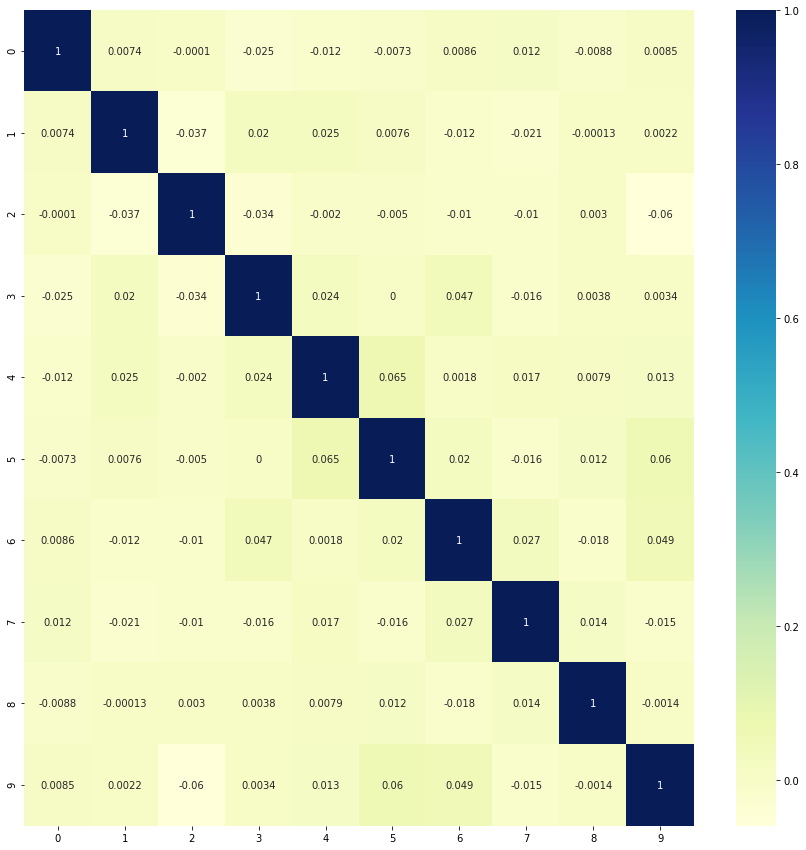

In [65]:
plt.figure(figsize = (15,15))
sns.heatmap(item_correlation_df.iloc[0:10,0:10],annot=True,cmap="YlGnBu")
plt.show()

In [66]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1.        , 0.00740053, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00740053, 1.        , 0.        , ..., 0.        , 0.00221467,
        0.00257787],
       [0.        , 0.        , 1.        , ..., 0.        , 0.00266318,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.00163713,
        0.        ],
       [0.        , 0.00221467, 0.00266318, ..., 0.00163713, 1.        ,
        0.        ],
       [0.        , 0.00257787, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [67]:
item_predicted_ratings = np.dot((beer_item_features.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.35989147, 0.51744748, 0.2553731 , ..., 1.14529748, 0.38953664,
        0.56800368],
       [0.        , 0.08921178, 0.10086486, ..., 0.        , 0.01071239,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.10460619, 0.        ,
        0.        ],
       ...,
       [0.17429468, 0.03372048, 0.23950166, ..., 0.        , 0.16621197,
        0.65613821],
       [0.06094549, 0.10910981, 0.08516678, ..., 0.        , 0.01516351,
        0.05793994],
       [0.        , 0.00714412, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [68]:
item_predicted_ratings.shape

(17434, 2455)

In [69]:
dummy_train.shape

(17434, 2455)

In [70]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,74123,74272,74321,74323,74390,74530,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.359891,0.517447,0.255373,0.320037,0.230415,0.661944,0.721117,0.687467,0.991627,0.696087,...,0.161280,0.462720,0.434720,0.188542,0.692059,0.490451,0.776098,1.145297,0.389537,0.568004
01Ryan10,0.000000,0.089212,0.100865,0.004002,0.000000,0.000000,0.098258,0.000000,0.308664,0.000105,...,0.000000,0.001351,0.000000,0.017323,0.143841,0.000000,0.000000,0.000000,0.010712,0.000000
04101Brewer,0.000000,0.000000,0.000000,0.007377,0.000000,0.000000,0.001281,0.000000,0.003723,0.000022,...,0.000000,0.000000,0.000000,0.000000,0.018336,0.000000,0.000000,0.104606,0.000000,0.000000
05Harley,0.241103,0.606251,0.309740,1.052188,0.922334,1.292402,0.533509,0.601633,1.028553,0.846109,...,0.285933,0.730433,0.579128,0.523289,0.485305,0.898718,1.511314,0.311411,0.772020,0.402628
0beerguy0,0.071078,0.142723,0.004660,0.277784,0.122305,0.000000,0.132399,0.106120,0.005397,0.000000,...,0.029814,0.000000,0.000000,0.027074,0.079290,0.202917,0.000000,0.000000,0.005020,0.018207


In [71]:
item_final_rating.iloc[2].sort_values(ascending=False)[0:5]

beer_beerid
6371     0.819127
46290    0.584058
33427    0.553867
57114    0.535517
42491    0.472987
Name: 04101Brewer, dtype: float64

### Q3.6: Top 5 beers recommended to the users 'cokes', 'genog' and 'giblet' using Item Based Model

In [72]:
## Top 5 beer recommended to Cokes
item_final_rating.loc['cokes'].sort_values(ascending=False)[0:5]

beer_beerid
1469     12.353424
30656    12.017994
21363    11.878478
9135     11.855205
1876     11.701632
Name: cokes, dtype: float64

In [73]:
## Top 5 beer recommended to Cokes
item_final_rating.loc['genog'].sort_values(ascending=False)[0:5]

beer_beerid
28267    4.145098
30656    4.028813
7879     3.980688
2508     3.683132
2904     3.676799
Name: genog, dtype: float64

In [74]:
## Top 5 beer recommended to Cokes
item_final_rating.loc['giblet'].sort_values(ascending=False)[0:5]

beer_beerid
341     3.800479
1332    3.690407
1635    3.579895
6590    3.564295
7975    3.464313
Name: giblet, dtype: float64

## Model Evaluation

In [75]:
test_beer_features = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)
mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

# User Similarity Matrix
test_user_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_user_correlation[np.isnan(test_user_correlation)] = 0
print(test_user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [76]:
test_user_correlation[test_user_correlation<0]=0
test_user_predicted_ratings = np.dot(test_user_correlation, test_beer_features.fillna(0))
test_user_predicted_ratings

array([[0.17890175, 0.69308069, 0.3582162 , ..., 0.20306566, 0.22168771,
        0.13416408],
       [0.09669903, 0.        , 0.02759111, ..., 0.62529565, 1.80391989,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.79214497, 1.94441338, 0.70000575, ..., 0.54379413, 0.33525871,
        0.        ]])

In [77]:
test_user_final_rating = np.multiply(test_user_predicted_ratings,dummy_test)

In [78]:
test_user_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,74123,74272,74321,74323,74390,74530,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0runkp0s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_user_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(copy=True, feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [80]:
test_ = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [81]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [82]:
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

1.9442613207859252


### The RMSE score for the User based model is 1.94 

In [83]:
## Using Item Similarity

In [84]:
test_beer_features = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).T

mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

test_item_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_item_correlation[np.isnan(test_item_correlation)] = 0
test_item_correlation[test_item_correlation<0]=0

In [85]:
test_item_correlation.shape

(2455, 2455)

In [86]:
test_beer_features.shape

(2455, 12569)

In [87]:
test_item_predicted_ratings = (np.dot(test_item_correlation, test_beer_features.fillna(0))).T
test_item_final_rating = np.multiply(test_item_predicted_ratings,dummy_test)
test_item_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,74123,74272,74321,74323,74390,74530,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0runkp0s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
test_ = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [89]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_item_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))


test_ = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

MinMaxScaler(copy=True, feature_range=(1, 5))


In [90]:
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.01357753727658


### The RMSE score for the item based model is 2.01

### Q3.5: Compare the performance of the two models using test data and suggest the one that should be deployed

We can observe that the RMSE score for the User based model(1.94) is less than the RMSE score for the Item based model(2.01).
So we should go with the User based model.